# Sher Khan Mari,(Data Engineer fun)


# We have divided the process into parts
1. Exploring and Cleaning the data
2. Topic modeling for all years and sentiment analyse
3. Topic modeling year by year and sentiment analyse
4. Star review for all data and plotting
5. Star review year by year in centralized place
6. concluding remarks 

# 1.  Exploring and Cleaning the data


We will start off with importing the libraries and then looking at data
We will import libraries as per need on the go and add comments wherever necessary

In [1]:
# these are two basic libraries to get started with
import pandas as pd
import os
# setting warning to only once so that we don't see them everytime 
import warnings
warnings.filterwarnings('ignore')

C:\Users\sher\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sher\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\sher\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# getting the current directory and file path and loading it into a dataframe
current_directory = os.path.abspath(os.getcwd())
full_file_path = os.path.join(current_directory,'train_reviews.json')
reviews_df =  pd.read_json(full_file_path)
full_file_path # just for viewing purpose

'C:\\Users\\sher\\Desktop\\A_Netherland\\jobs_related\\okra_tech_data_engineer\\assignment\\train_reviews.json'

Let's do a bit for exploration by looking at data that how it looks and how many column it has etc

In [3]:
# this is command which shows the top 5 rows from pandas data frame
reviews_df.head()

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,Pretty awful service,I phoned National rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,Awful staff,I travel from Brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium


In [4]:
# Lets have a look at tail too, see that how does it looks
reviews_df.tail()

,date,title,text,url,stars
2016,2017-07-06 20:20:58+00:00,Late,"Late, cancelled, signal failures, too much rai...",https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium
2017,2016-11-29 10:26:41+00:00,Not sure why they even have timetables,Trains are constantly delayed or cancelled. I ...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium
2018,2016-07-17 07:42:11+00:00,Helpful guards,On a yearly basis we take a group of Preschool...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-5 star-rating--medium
2019,2016-05-22 12:25:51+00:00,Often late but clean and decent.,I travel by them every day. I like their newis...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-3 star-rating--medium
2020,2015-10-21 14:12:51+00:00,"Train service has improved, but customer servi...",To start with the positives:,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-2 star-rating--medium


By Looking at tail and head and date column we can see data is not sorted, lets first sort it 
out by sorting the date column

In [5]:
# this is command used for sorting values by column name
reviews_df.sort_values(by='date', inplace=True)

# then we will have a look at head and see how it looks now
reviews_df.head()

,date,title,text,url,stars
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
1950,2011-11-20 20:43:09+00:00,"Reasonable prices, good service","First class is very spacious, free wireless in...",https://uk.trustpilot.com/review/www.hulltrain...,star-rating star-rating-4 star-rating--medium
931,2015-01-07 23:32:34+00:00,Fantastic customer service,Virgin trains customer service are amazing,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-5 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
930,2015-02-11 13:20:32+00:00,Best customer service,I was at traveling back to Coventry from Wolve...,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-5 star-rating--medium


In [6]:
# lets have a look at information or we can say meta data and get to know data types etc
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 4 to 1879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    2021 non-null   datetime64[ns, UTC]
 1   title   2021 non-null   object             
 2   text    2021 non-null   object             
 3   url     2021 non-null   object             
 4   stars   2021 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 94.7+ KB


In [7]:
# checking if there is any null in our data 
reviews_df.isna().any()

date     False
title    False
text     False
url      False
stars    False
dtype: bool

Stars and url column looks bit lengthy does not serve much purpose as we can use one number for rating and url can be shorten to specific website url

In [8]:
# in order to have a closer look we pulled only two column just random rows for viewing
reviews_df.loc[4:2,['url','stars']]

,url,stars
4,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
1950,https://uk.trustpilot.com/review/www.hulltrain...,star-rating star-rating-4 star-rating--medium
931,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-5 star-rating--medium
3,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
930,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-5 star-rating--medium
929,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-2 star-rating--medium
2,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium


In [9]:
# lets query our dataframe and see whether we can extract specific information that way
# later on we need to make the urls consistent and remove trustpilot prefix part 
reviews_df.query('url.str.contains("www.eurostar.com")', engine='python')

,date,title,text,url,stars
1438,2016-01-19 13:25:19+00:00,Terrible UX,Awful UX. Shocking for such s big company. The...,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-1 star-rating--medium
1437,2016-01-24 07:07:11+00:00,Appalling,"Useless, arrogant, rude, aggressive staff with...",https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-1 star-rating--medium
1436,2016-03-20 13:38:27+00:00,Don't like the new trains,I have traveled back from France a few weeks a...,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-3 star-rating--medium
1435,2016-04-14 14:58:03+00:00,Using the Recent Tragic Events in Brussels for...,Beware this is not an honest company!,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-1 star-rating--medium
1434,2016-04-30 12:57:54+00:00,"Easy to book, but limited options via app. Exc...",I haven't used Eurostar yet but the ease of bo...,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-5 star-rating--medium
...,...,...,...,...,...
1233,2018-07-09 15:59:59+00:00,I have taken eurostar frequently for 10…,I have taken eurostar frequently for 10 years ...,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-1 star-rating--medium
1380,2018-07-12 15:22:13+00:00,Oh I wish I had read Trustpilot before booking,This is not so much a train company as an expe...,https://uk.trustpilot.com/review/www.eurostar.com,star-rating star-rating-1 star-rating--medium
1232,2018-07-12 15:22:13+00:00,Oh I wish I had read Trustpilot before booking,This is not so much a train company as an expe...,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-1 star-rating--medium
1231,2018-07-16 09:56:34+00:00,Eurostar took 3 payments out for the same tick...,A £265 journey was charged 3 times on my credi...,https://uk.trustpilot.com/review/www.eurostar....,star-rating star-rating-1 star-rating--medium


Cool, We can query our data and extract by site or yearly or different kind of data 
Then lets move further and pull out some data and see if what useful operation we can perform.

In [10]:
# Running up some cleaning on url so that we can chop of that truspilot part as its redundant
reviews_df['url'] = reviews_df['url'].str.replace('https://uk.trustpilot.com/review/','')
reviews_df['url'] = reviews_df['url'].str.replace('page=','')
reviews_df['url'] = reviews_df['url'].str.replace('?','')
reviews_df['url'] = reviews_df['url'].str.replace('=','')

# checking if there is any number remaining yet, because due to different page numbers
for i in range(60):
    reviews_df['url'] = reviews_df['url'].str.replace(str(i),'')
    
    
reviews_df[['url']]

,url
4,www.nationalrail.co.uk
1950,www.hulltrains.co.uk
931,www.virgintrains.co.uk
3,www.nationalrail.co.uk
930,www.virgintrains.co.uk
...,...
1151,www.arrivatrainswales.co.uk
1880,www.gwr.com
1740,www.gwr.com
1730,www.gwr.com


This looks better because now we are only dealing with website part

In [11]:
#now as we have cleaned up websites lets have a look at and see how many time each website appeared
# in the review
websites_count =  reviews_df.url.value_counts()
websites_count

www.virgintrains.co.uk                     500
www.nationalrail.co.uk                     465
www.southernrailway.com                    280
www.eurostar.com                           200
www.gwr.com                                200
www.virgintrainseastcoast.com              140
www.buytickets.crosscountrytrains.co.uk     40
www.tpexpress.co.uk                         40
www.eastmidlandstrains.co.uk                40
www.arrivatrainswales.co.uk                 40
www.southeasternrailway.co.uk               20
www.grandcentralrail.com                    19
www.southwesternrailway.com                 13
www.londonnorthwesternrailway.co.uk          8
chilternrailways.co.uk                       8
sleeper.scot                                 6
www.hulltrains.co.uk                         2
Name: url, dtype: int64

A general observation: Half of the data mostly belongs to only two trains
As we can see the data is more toward virgin and national rail line then 
southern and eurostar has its fair share, rest are bit on less side

In [12]:
# lets look at the head now again
reviews_df.head()

,date,title,text,url,stars
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,www.nationalrail.co.uk,star-rating star-rating-4 star-rating--medium
1950,2011-11-20 20:43:09+00:00,"Reasonable prices, good service","First class is very spacious, free wireless in...",www.hulltrains.co.uk,star-rating star-rating-4 star-rating--medium
931,2015-01-07 23:32:34+00:00,Fantastic customer service,Virgin trains customer service are amazing,www.virgintrains.co.uk,star-rating star-rating-5 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,www.nationalrail.co.uk,star-rating star-rating-4 star-rating--medium
930,2015-02-11 13:20:32+00:00,Best customer service,I was at traveling back to Coventry from Wolve...,www.virgintrains.co.uk,star-rating star-rating-5 star-rating--medium


Still there some cleaning needs to be done on stars as they represent a number and there is long string which is redudant and may cause problems in future for any algorithm while training or doing some processing on them

In [13]:
# lets replace the useless strings with empty so that we have only useful number
reviews_df[['stars']]
reviews_df['stars'] = reviews_df['stars'].str.replace('star-rating','')
reviews_df['stars'] = reviews_df['stars'].str.replace('--medium','')
reviews_df['stars'] = reviews_df['stars'].str.replace('-','')
# finally, lets see and verify does our commands worked on column
reviews_df[['stars']]

,stars
4,4
1950,4
931,5
3,4
930,5
...,...
1151,1
1880,1
1740,1
1730,1


Now the only thing remaining is "date" column where we are not interested much in time for now we will be mostly looking at the year so lets chop it off.
But as we have earlier run a command reviews_df.info() we saw that first column type is datetime so we can change to string for ease and then we can index the string

In [14]:
# we are treating the date as string and from starting position until 10th character we have all data
# yyyy-mm-dd in that format which is sufficient for us for now
reviews_df['date'] = reviews_df['date'].astype(str).str[0:10]
reviews_df.head()

,date,title,text,url,stars
4,2011-05-28,Check it out.,I always use the national rail enquiry site wh...,www.nationalrail.co.uk,4
1950,2011-11-20,"Reasonable prices, good service","First class is very spacious, free wireless in...",www.hulltrains.co.uk,4
931,2015-01-07,Fantastic customer service,Virgin trains customer service are amazing,www.virgintrains.co.uk,5
3,2015-01-13,Very good,Saved about £50 on a single trip using Nationa...,www.nationalrail.co.uk,4
930,2015-02-11,Best customer service,I was at traveling back to Coventry from Wolve...,www.virgintrains.co.uk,5


Now that our data is cleaned up and we know our data in better let's do process the topic modeling and year by year data and star reviews

# 2. Topic modeling for all years and sentiment analyse

In [42]:
# importing regular expression library and string libraru
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
stopwords = nltk.corpus.stopwords.words('english')

""" this is centralized function to token words, remove stop words etc """
def process_sentences(reviews):
    
    # getting stop words from NLTK corpus
    
    lemmatizer = WordNetLemmatizer()
    # initilaization of my custom list to save words 
    doc_list = []

    #I have added few extra words and different symbols after first run
    my_stop_words = ['eurostar','london','paris','brussels',"'s",'st',"``",",",'""',"''",' ']
    for myword in my_stop_words:
        stopwords.append(myword)

    # getting the title of all the reviews
    for sentence in reviews:
        # we will token the sentences for further processing
        word_tokens =  nltk.tokenize.word_tokenize(sentence)
        temp_list  = []
        # loop through all tokens of current sentence
        for word in word_tokens:
            word = word.lower()
            # if word is not a stop word and also if match with only letters
            if word not in stopwords:
                punct_free_text = re.sub("[^A-Za-z]",'',word)
                # checking so that single characters words would not come up
                if len(punct_free_text)>2:
                    # lemmatize means bring the word in its original form from past tense
                    lemmatized_word = lemmatizer.lemmatize(punct_free_text)
                    temp_list.append(lemmatized_word)

        doc_list.append(temp_list)
    # finally, return the processed doc list where all proper words are stored
    return doc_list

In [47]:
# here we have sent all the reviews to our sentence processing function 
# which return doc list
doc_list = process_sentences(reviews_df['title'])
# doc_list[110]


We have did some online research and found LDA to be good for simple topic modeling for our case
Latent Dirichlet Allocation(LDA) is a popular algorithm and process quickly 

In [48]:
# importing necessary libraries as they will come handly as we go along
# we are making sure that we have all the tools with use
import numpy as np

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from pprint import pprint
warnings.filterwarnings("ignore")



In [49]:
# importing LDA 
import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim as gensimvis

# creating dicationary of words
words = corpora.Dictionary(doc_list)
# creating bag of words
corpus =  [words.doc2bow(doc) for doc in doc_list]
# finally, we have our model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=words,num_topics=10, random_state=2, update_every=1, passes=10, alpha='auto',per_word_topics=True)

pyLDAvis.enable_notebook()
# visualizing the processed model and data
vis = gensimvis.prepare(lda_model, corpus, words)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.092399 -0.129066       1        1  19.373378
6     -0.061631  0.072274       2        1  14.929077
9     -0.028665  0.115649       3        1  11.407775
5     -0.090081 -0.198770       4        1   9.187727
3     -0.036545  0.100416       5        1   9.076451
1     -0.076567 -0.225818       6        1   8.616031
4      0.447115 -0.069367       7        1   8.365216
8     -0.024190  0.107271       8        1   6.858553
0      0.015439  0.145203       9        1   6.321224
7     -0.052475  0.082208      10        1   5.864568, topic_info=         Term        Freq       Total Category  logprob  loglift
453    review  225.000000  225.000000  Default  30.0000  30.0000
128  possible  218.000000  218.000000  Default  29.0000  29.0000
4     service  409.000000  409.000000  Default  28.0000  28.0000
32   terrible  146.000000  146.000000  Default  27.0000  27.0000
112      star   90.000000   90.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
66     ticket    4.426034   31.202391  Topic10  -4.4621   0.8833
78       rail    3.321704   16.593909  Topic10  -4.7491   1.2277
195      even    2.249229   11.288273  Topic10  -5.1390   1.2231
129       one    2.183781   15.709333  Topic10  -5.1685   0.8630
16     virgin    2.003584   54.810701  Topic10  -5.2547  -0.4727

[430 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
323       1  0.829444    absolute
471       1  0.804272  absolutely
471       2  0.134045  absolutely
1201      5  0.932443      access
1058      9  0.513801     account
...     ...       ...         ...
269       9  0.989768       would
1189      8  0.441425     writing
748      10  0.730264   yesterday
1004      4  0.635895         yet
113       9  0.403927        zero

[444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 10, 6, 4, 2, 5, 9, 1, 8])

Above is  a glimpse that what are the 10 topics can be and what words are available in these
graph is kind of self describing, then further we will also look at the sentences at individual level afterword

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') # needs download first time for use
# this sentiment analyser for a sentence and pretrained
sia = SentimentIntensityAnalyzer() 

# we will get only topics of that lda model and then look into the sentences
topics = lda_model.show_topics(num_topics=10)
only_topics = []

# appending individual tokens to make up a sentence
for i in range(10):
    topic_str = re.sub('[^a-zA-Z*]+', '', topics[i][1])
    topic = topic_str.split('*')
    only_topics.append(topic)
    
# only_topics
#============================================
sentiment_dict = []
overall_topic_headings = []
for i in range(10):
    line = ''
    for word in only_topics[i]:
        line+= ' '+word
    # creating a line from the topic words
    overall_topic_headings.append(line)
    sentiment = sia.polarity_scores(text=line)
    sentiment_dict.append(sentiment)

    
print("here are over all main topics extracted from heading people are talking about")
print("_______________________________________________________________________________")
temp_list = []
for topic in overall_topic_headings:
    print(topic)
    print("_______________________________________________________________________________")

sentiment_dict
topic_sentiment_df = pd.DataFrame.from_dict(sentiment_dict)
topic_sentiment_df.head()

here are over all main topics extracted from heading people are talking about
_______________________________________________________________________________
  star would appropriate could give le seat purchased ticket internet
_______________________________________________________________________________
  service overcrowded shoddy website always delayed unacceptable total nightmare misleading
_______________________________________________________________________________
  service customer worst company joke train ever disgusting dire app
_______________________________________________________________________________
  use good booking disabled timetable information break assistance unable term
_______________________________________________________________________________
  review possible awful site hunted board gave see con rolling
_______________________________________________________________________________
  service terrible poor always customer avoid coast east complaint re

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.521,0.479,0.000,-0.7650
2,0.561,0.321,0.118,-0.8519
3,0.000,0.756,0.244,0.4404
4,0.250,0.750,0.000,-0.4588


above are the main topics extractecd, and they are not some semantic meanig sentences but made up of individual words
Now, further we can view the mean positive and negative ratio through nltk sentimentIntensityAnalyser/
For example: if we check last sentence " bad staff class first rude experience unhelpful", as we can see this is more toward negative side lets check the mean negativity and positive ration using sentiment analyser and then show a bar chart

<AxesSubplot:>

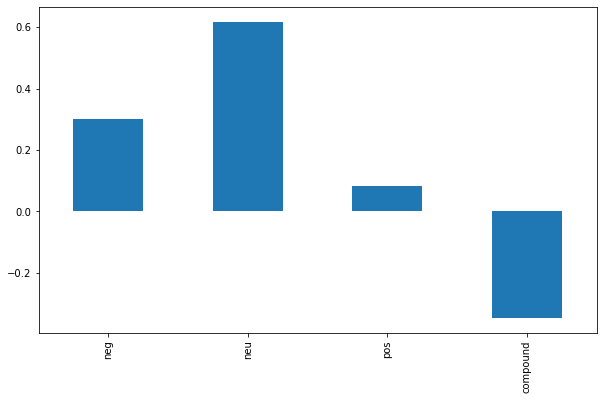

In [51]:
# del topic_sentiment_df['compound'] # this line should be used only once
mean_values = topic_sentiment_df.mean()
# checking the type of mean values
type(mean_values)

# importing for showing a bar chart
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
mean_values.plot(kind="bar")

# 3. Topic modeling year by year and sentiment analyse

###   year by year discussion topics

In [52]:
#2011,2015,2016,2017,2018
#not found 2012,2013,2014
# we will put the reviews for each year in separate data frame for easy processing
only_2011_reviews = reviews_df.query('date.str.contains("2011")', engine='python')
only_2015_reviews = reviews_df.query('date.str.contains("2015")', engine='python')
only_2016_reviews = reviews_df.query('date.str.contains("2016")', engine='python')
only_2017_reviews = reviews_df.query('date.str.contains("2017")', engine='python')
only_2018_reviews = reviews_df.query('date.str.contains("2018")', engine='python')

# as we can see 2011 got only two reviews we can mark it as outlier
only_2011_reviews

,date,title,text,url,stars
4,2011-05-28,Check it out.,I always use the national rail enquiry site wh...,www.nationalrail.co.uk,4
1950,2011-11-20,"Reasonable prices, good service","First class is very spacious, free wireless in...",www.hulltrains.co.uk,4


# year 2015

In [57]:
# here we have sent all the reviews of 2015 year to our sentence processing function 
# which return doc list
# 
doc_list = process_sentences(only_2015_reviews['text'])


In [58]:

# creating dicationary of words
words = corpora.Dictionary(doc_list)
# creating bag of words
corpus =  [words.doc2bow(doc) for doc in doc_list]
# finally, we have our model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=words,num_topics=10, random_state=2, update_every=1, passes=10, alpha='auto',per_word_topics=True)

pyLDAvis.enable_notebook()
# visualizing the processed model and data
vis = gensimvis.prepare(lda_model, corpus, words)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.063636 -0.138130       1        1  18.188554
4      0.082800 -0.070504       2        1  16.584006
2      0.057485  0.003583       3        1  16.013635
3     -0.201481 -0.066524       4        1  12.609557
9      0.002126  0.067253       5        1   9.309845
7      0.014552  0.073224       6        1   7.409219
6     -0.000572  0.033793       7        1   5.462933
0     -0.011258  0.047404       8        1   5.372120
8      0.011870  0.042509       9        1   5.277476
5     -0.019158  0.007392      10        1   3.772654, topic_info=          Term       Freq      Total Category  logprob  loglift
9      journey  20.000000  20.000000  Default  30.0000  30.0000
62       first   9.000000   9.000000  Default  29.0000  29.0000
105      would  16.000000  16.000000  Default  28.0000  28.0000
89        seat  19.000000  19.000000  Default  27.0000  27.0000
3        train  55.000000  55.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
640  cancelled   0.512871   5.035113  Topic10  -5.2910   0.9932
175      never   0.512619   4.198568  Topic10  -5.2915   1.1744
420    delayed   0.512594   5.279037  Topic10  -5.2915   0.9454
304    booking   0.512441   7.074371  Topic10  -5.2918   0.6523
242       also   0.512160   2.618508  Topic10  -5.2924   1.6457

[597 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
846       3  0.687226        able
634       1  0.462762  absolutely
634       3  0.231381  absolutely
634      10  0.231381  absolutely
400       1  0.708463      accept
...     ...       ...         ...
413       3  0.179908        year
413       7  0.179908        year
413       9  0.179908        year
414       2  0.389119   yesterday
414       9  0.389119   yesterday

[868 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 10, 8, 7, 1, 9, 6])

In [59]:
topics = lda_model.show_topics(num_topics=10)
only_topics = []
# as we have 10 topics so we will iterate till 10
for i in range(10):
    # using regular expression to chose only letters
    topic_str = re.sub('[^a-zA-Z*]+', '', topics[i][1])
    topic = topic_str.split('*')
    only_topics.append(topic)
# only_topics
#============================================
sentiment_dict = []
overall_topic_headings = []
for i in range(10):
    line = ''
    for word in only_topics[i]:
        line+= ' '+word
        
    # converting word list to a line to feed to sentimentIntensityAnalyser
    overall_topic_headings.append(line)
    sentiment = sia.polarity_scores(text=line)
    # appending the result to sentiment dict
    sentiment_dict.append(sentiment)

    
print("here are over all main topics extracted from heading people are talking about")
print("_______________________________________________________________________________")
temp_list = []
for topic in overall_topic_headings:
    print(topic)
    print("_______________________________________________________________________________")

sentiment_dict
topic_sentiment_df = pd.DataFrame.from_dict(sentiment_dict)
topic_sentiment_df.head()

here are over all main topics extracted from heading people are talking about
_______________________________________________________________________________
  first would class train service code journey time good trip
_______________________________________________________________________________
  train ticket seat could would service website still one change
_______________________________________________________________________________
  train ticket journey service way staff customer manchester problem company
_______________________________________________________________________________
  virgin staff information waverley passenger rail newcastle website service hundred
_______________________________________________________________________________
  ticket train virgin get seat buy use time journey pay
_______________________________________________________________________________
  journey customer told could time train travel voucher back department
_________________________

,neg,neu,pos,compound
0,0.000,0.756,0.244,0.4404
1,0.000,1.000,0.000,0.0000
2,0.231,0.769,0.000,-0.4019
3,0.000,1.000,0.000,0.0000
4,0.135,0.865,0.000,-0.1027


<AxesSubplot:title={'center':'choosen topic sentiment based on pre-trained nltk sentiment analyser'}>

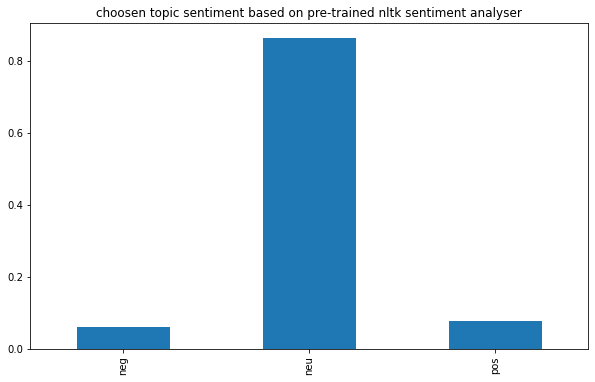

In [62]:
# del topic_sentiment_df['compound'] # this line should be used only once
mean_values = topic_sentiment_df.mean()
type(mean_values)
mean_values
# importing graphical library
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.title("choosen topic sentiment based on pre-trained nltk sentiment analyser")
mean_values.plot(kind="bar")

# year 2016

In [63]:
# here we have sent all the reviews of 2016 year to our sentence processing function 
# which return doc list
# 
doc_list = process_sentences(only_2016_reviews['text'])


In [64]:

# creating dicationary of words
words = corpora.Dictionary(doc_list)
# creating bag of words
corpus =  [words.doc2bow(doc) for doc in doc_list]
# finally, we have our model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=words,num_topics=10, random_state=2, update_every=1, passes=10, alpha='auto',per_word_topics=True)

pyLDAvis.enable_notebook()
# visualizing the processed model and data
vis = gensimvis.prepare(lda_model, corpus, words)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.047351 -0.076884       1        1  17.734184
1     -0.041692 -0.016757       2        1  15.051276
4     -0.038999  0.008770       3        1  11.560704
2     -0.014782 -0.048183       4        1  11.288534
3     -0.025067  0.092260       5        1   9.719182
6      0.105675 -0.030371       6        1   8.546707
0     -0.011022  0.037507       7        1   8.234556
5     -0.067971  0.034687       8        1   7.085380
8      0.045183 -0.072434       9        1   6.944454
7      0.096025  0.071405      10        1   3.835024, topic_info=         Term        Freq       Total Category  logprob  loglift
258     class   43.000000   43.000000  Default  30.0000  30.0000
268     first   48.000000   48.000000  Default  29.0000  29.0000
84      staff   55.000000   55.000000  Default  28.0000  28.0000
28     ticket  106.000000  106.000000  Default  27.0000  27.0000
31      train  285.000000  285.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
321    change    1.279042   19.128527  Topic10  -5.6826   0.5559
560   waiting    1.278436   12.716615  Topic10  -5.6831   0.9637
196       day    1.276630   50.638514  Topic10  -5.6845  -0.4195
92   southern    1.276418   50.420916  Topic10  -5.6847  -0.4154
127      long    1.275641   13.547419  Topic10  -5.6853   0.8982

[772 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1896      9  0.661339    aberdeen
2002      9  0.890233     ability
2025      7  0.648659      aboard
132       2  0.097255  absolutely
132       3  0.097255  absolutely
...     ...       ...         ...
896       9  0.130035         yet
35        1  0.189667        york
35        5  0.189667        york
35        8  0.379334        york
35       10  0.189667        york

[1670 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 5, 3, 4, 7, 1, 6, 9, 8])

In [65]:
topics = lda_model.show_topics(num_topics=10)
only_topics = []
# as we have 10 topics so we will iterate till 10
for i in range(10):
    # using regular expression to chose only letters
    topic_str = re.sub('[^a-zA-Z*]+', '', topics[i][1])
    topic = topic_str.split('*')
    only_topics.append(topic)
# only_topics
#============================================
sentiment_dict = []
overall_topic_headings = []
for i in range(10):
    line = ''
    for word in only_topics[i]:
        line+= ' '+word
        
    # converting word list to a line to feed to sentimentIntensityAnalyser
    overall_topic_headings.append(line)
    sentiment = sia.polarity_scores(text=line)
    # appending the result to sentiment dict
    sentiment_dict.append(sentiment)

    
print("here are over all main topics extracted from heading people are talking about")
print("_______________________________________________________________________________")
temp_list = []
for topic in overall_topic_headings:
    print(topic)
    print("_______________________________________________________________________________")

sentiment_dict
topic_sentiment_df = pd.DataFrame.from_dict(sentiment_dict)
topic_sentiment_df.head()

here are over all main topics extracted from heading people are talking about
_______________________________________________________________________________
  time train southern service get ticket would work email take
_______________________________________________________________________________
  train staff time ticket service one company virgin would get
_______________________________________________________________________________
  train get ticket service southern company use website customer seat
_______________________________________________________________________________
  train service ticket time day delayed back southern company one
_______________________________________________________________________________
  train service ticket time back staff people travel journey virgin
_______________________________________________________________________________
  train get service one virgin time could would journey travel
_________________________________________________

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.000,1.000,0.0,0.0000
2,0.000,1.000,0.0,0.0000
3,0.174,0.826,0.0,-0.2263
4,0.000,1.000,0.0,0.0000


<AxesSubplot:title={'center':'choosen topic sentiment based on pre-trained nltk sentiment analyser'}>

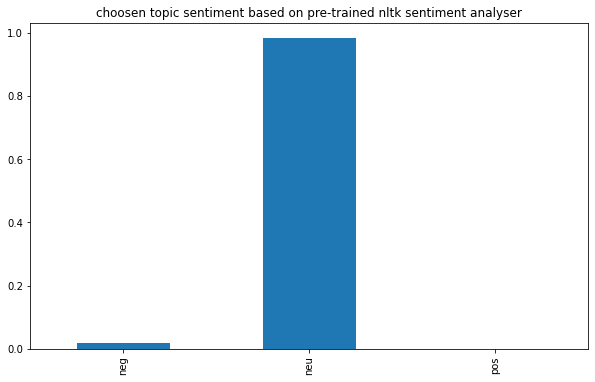

In [67]:
# del topic_sentiment_df['compound'] # this line should be used only once
mean_values = topic_sentiment_df.mean()
type(mean_values)
mean_values
# importing graphical library
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.title("choosen topic sentiment based on pre-trained nltk sentiment analyser")
mean_values.plot(kind="bar")

# year 2017 

In [68]:
# here we have sent all the reviews of 2017 year to our sentence processing function 
# which return doc list
# 
doc_list = process_sentences(only_2017_reviews['text'])


In [69]:

# creating dicationary of words
words = corpora.Dictionary(doc_list)
# creating bag of words
corpus =  [words.doc2bow(doc) for doc in doc_list]
# finally, we have our model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=words,num_topics=10, random_state=2, update_every=1, passes=10, alpha='auto',per_word_topics=True)

pyLDAvis.enable_notebook()
# visualizing the processed model and data
vis = gensimvis.prepare(lda_model, corpus, words)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.071135  0.013896       1        1  18.647038
5     -0.079739  0.001764       2        1  17.482682
8     -0.092616 -0.010236       3        1  15.844337
3     -0.051499  0.024145       4        1  15.271828
7      0.083370  0.088021       5        1   6.966417
6      0.022549  0.056519       6        1   6.004610
2      0.055894 -0.155684       7        1   5.233065
1      0.038914 -0.031659       8        1   5.153871
9      0.091776  0.030380       9        1   5.012717
4      0.002485 -0.017146      10        1   4.383436, topic_info=         Term        Freq       Total Category  logprob  loglift
81      train  486.000000  486.000000  Default  30.0000  30.0000
98    service  263.000000  263.000000  Default  29.0000  29.0000
201  customer  159.000000  159.000000  Default  28.0000  28.0000
92      first   73.000000   73.000000  Default  27.0000  27.0000
83     virgin  170.000000  170.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
215       day    3.561498   58.034901  Topic10  -5.3939   0.3365
51       back    3.710427   69.637760  Topic10  -5.3529   0.1952
83     virgin    4.245993  170.230340  Topic10  -5.2181  -0.5638
82     travel    3.110218   73.579244  Topic10  -5.5294  -0.0363
6         get    2.920029  143.665858  Topic10  -5.5925  -0.7686

[795 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
516       2  0.767391     acceptance
1373      4  0.867997       accepted
156       1  0.763419       accident
3033      8  0.656074  accommodation
1973      9  0.888242             ad
...     ...       ...            ...
17        5  0.107412           year
17        6  0.107412           year
17        8  0.080559           year
17        9  0.026853           year
2640      8  0.656074            zin

[1765 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 9, 4, 8, 7, 3, 2, 10, 5])

In [70]:
topics = lda_model.show_topics(num_topics=10)
only_topics = []
# as we have 10 topics so we will iterate till 10
for i in range(10):
    # using regular expression to chose only letters
    topic_str = re.sub('[^a-zA-Z*]+', '', topics[i][1])
    topic = topic_str.split('*')
    only_topics.append(topic)
# only_topics
#============================================
sentiment_dict = []
overall_topic_headings = []
for i in range(10):
    line = ''
    for word in only_topics[i]:
        line+= ' '+word
        
    # converting word list to a line to feed to sentimentIntensityAnalyser
    overall_topic_headings.append(line)
    sentiment = sia.polarity_scores(text=line)
    # appending the result to sentiment dict
    sentiment_dict.append(sentiment)

    
print("here are over all main topics extracted from heading people are talking about")
print("_______________________________________________________________________________")
temp_list = []
for topic in overall_topic_headings:
    print(topic)
    print("_______________________________________________________________________________")

sentiment_dict
topic_sentiment_df = pd.DataFrame.from_dict(sentiment_dict)
topic_sentiment_df.head()

here are over all main topics extracted from heading people are talking about
_______________________________________________________________________________
  train service ticket customer virgin first class would time journey
_______________________________________________________________________________
  train service get day gwr time virgin coffee site use
_______________________________________________________________________________
  train would staff ticket birmingham new platform website virgin work
_______________________________________________________________________________
  train ticket service get told late virgin time even hour
_______________________________________________________________________________
  customer service ticket train one price phone minute terrible even
_______________________________________________________________________________
  train ticket service get hour virgin customer would minute time
___________________________________________________

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.000,1.000,0.0,0.0000
2,0.000,1.000,0.0,0.0000
3,0.000,1.000,0.0,0.0000
4,0.256,0.744,0.0,-0.4767


<AxesSubplot:title={'center':'choosen topic sentiment based on pre-trained nltk sentiment analyser'}>

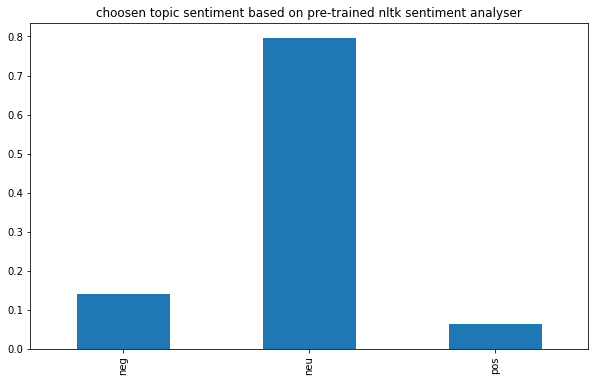

In [78]:
# del topic_sentiment_df['compound'] # this line should be used only once
mean_values = topic_sentiment_df.mean()
type(mean_values)
mean_values
# importing graphical library
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.title("choosen topic sentiment based on pre-trained nltk sentiment analyser")
mean_values.plot(kind="bar")

# year 2018

In [73]:
# here we have sent all the reviews of 2018 year to our sentence processing function 
# which return doc list
# 
doc_list = process_sentences(only_2018_reviews['text'])

In [74]:

# creating dicationary of words
words = corpora.Dictionary(doc_list)
# creating bag of words
corpus =  [words.doc2bow(doc) for doc in doc_list]
# finally, we have our model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=words,num_topics=10, random_state=2, update_every=1, passes=10, alpha='auto',per_word_topics=True)

pyLDAvis.enable_notebook()
# visualizing the processed model and data
vis = gensimvis.prepare(lda_model, corpus, words)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.058231 -0.062226       1        1  18.582032
9      0.025652 -0.023532       2        1  14.259628
6      0.051487  0.275117       3        1  12.464034
2      0.061650 -0.065471       4        1  10.340851
7      0.004278  0.036967       5        1   9.852099
0      0.069885 -0.069276       6        1   9.773335
3      0.077595 -0.081331       7        1   9.447784
4     -0.028990  0.004874       8        1   5.877753
5     -0.306427 -0.017170       9        1   5.571346
8     -0.013361  0.002047      10        1   3.831138, topic_info=        Term        Freq       Total Category  logprob  loglift
353      bad   73.000000   73.000000  Default  30.0000  30.0000
1333     bus  100.000000  100.000000  Default  29.0000  29.0000
931   review   97.000000   97.000000  Default  28.0000  28.0000
205   ticket  330.000000  330.000000  Default  27.0000  27.0000
36     train  984.000000  984.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
144    class    4.949672  136.469780  Topic10  -5.4138  -0.0548
118   travel    4.533313  120.542380  Topic10  -5.5017  -0.0185
90      hour    4.505935  124.470362  Topic10  -5.5078  -0.0567
139      one    4.600082  199.607605  Topic10  -5.4871  -0.5083
438     make    3.899153   61.364352  Topic10  -5.6524   0.5059

[658 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3074     10  0.967929    abroad
583       1  0.022505  absolute
583       2  0.045011  absolute
583       3  0.461359  absolute
583       5  0.438853  absolute
...     ...       ...       ...
152       6  0.127704      year
152       7  0.051082      year
152       8  0.102163      year
152       9  0.076622      year
152      10  0.204326      year

[1569 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 7, 3, 8, 1, 4, 5, 6, 9])

In [80]:
topics = lda_model.show_topics(num_topics=10)
only_topics = []
# as we have 10 topics so we will iterate till 10
for i in range(10):
    # using regular expression to chose only letters
    topic_str = re.sub('[^a-zA-Z*]+', '', topics[i][1])
    topic = topic_str.split('*')
    only_topics.append(topic)
# only_topics
#============================================
sentiment_dict = []
overall_topic_headings = []
for i in range(10):
    line = ''
    for word in only_topics[i]:
        line+= ' '+word
        
    # converting word list to a line to feed to sentimentIntensityAnalyser
    overall_topic_headings.append(line)
    sentiment = sia.polarity_scores(text=line)
    # appending the result to sentiment dict
    sentiment_dict.append(sentiment)

    
print("here are over all main topics extracted from heading people are talking about")
print("_______________________________________________________________________________")
temp_list = []
for topic in overall_topic_headings:
    print(topic)
    print("_______________________________________________________________________________")

sentiment_dict
topic_sentiment_df = pd.DataFrame.from_dict(sentiment_dict)
topic_sentiment_df.head()

here are over all main topics extracted from heading people are talking about
_______________________________________________________________________________
  ticket train website class always booked service sorry time delayed
_______________________________________________________________________________
  train service get seat ticket first class hour customer time
_______________________________________________________________________________
  train time app get would always hour never delayed use
_______________________________________________________________________________
  bus time staff train passenger boarding disabled service ticket people
_______________________________________________________________________________
  even customer review service care website unacceptable read train national
_______________________________________________________________________________
  rail use card bank complaint week day account service last
_________________________________________

,neg,neu,pos,compound
0,0.286,0.714,0.000,-0.2960
1,0.000,1.000,0.000,0.0000
2,0.000,0.844,0.156,0.1695
3,0.000,1.000,0.000,0.0000
4,0.211,0.563,0.225,0.0516


<AxesSubplot:title={'center':'choosen topic sentiment based on pre-trained nltk sentiment analyser'}>

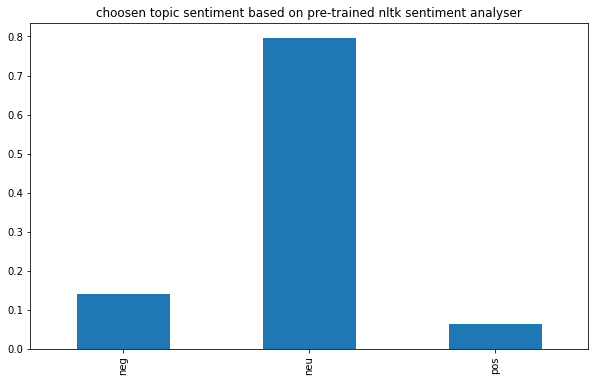

In [83]:
# del topic_sentiment_df['compound'] # this line should be used only once
mean_values = topic_sentiment_df.mean()
type(mean_values)
mean_values
# importing graphical library
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.title("choosen topic sentiment based on pre-trained nltk sentiment analyser")
mean_values.plot(kind="bar")

As we have seen how the year by year topics looks like and what is postivity and negativity ration we have shown these in bar charts

# 4. Star review for all data and plotting

In [86]:
# as we can see how many distinct star there are and the count of each one
stars_count =  reviews_df.stars.value_counts()
stars_count

 1     1601
 5      153
 2      136
 4       69
 3       62
Name: stars, dtype: int64

<AxesSubplot:title={'center':'Total stars count'}>

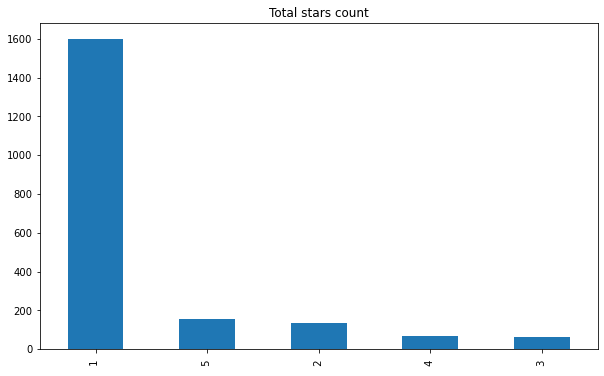

In [87]:
# Lets plot these for easy and quick viewing purposes
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.title("Total stars count")
stars_count.plot(kind="bar")

In [ ]:
#

# 5. Star review year by year in centralized place

In [88]:
# Lets first check star counts for each year as we have separated these earlier for every year

stars_count_2011 =  only_2011_reviews.stars.value_counts()
stars_count_2015 =  only_2015_reviews.stars.value_counts()
stars_count_2016 =  only_2016_reviews.stars.value_counts()
stars_count_2017 =  only_2017_reviews.stars.value_counts()
stars_count_2018 =  only_2018_reviews.stars.value_counts()
print(stars_count_2017)

 1     422
 5      53
 2      47
 3      16
 4      13
Name: stars, dtype: int64


Now we will write some plotting function which show us the data in an easy way, such as bars with star indication
and then we will use labelticks to indicate each year


In [89]:
# importing matplot if previous one happens to be separate from this cell
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

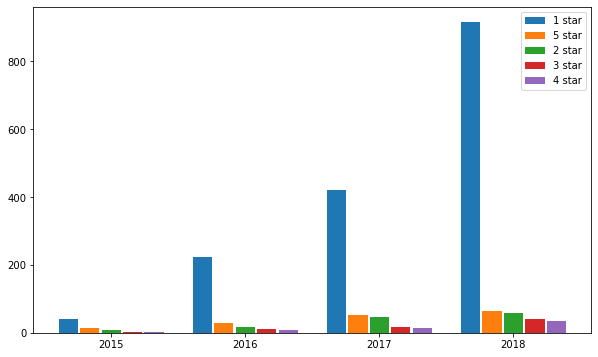

In [90]:
# as we have wrote the above function now we will see the data and pass it to function
data = {
    "1 star": [ stars_count_2015[0], stars_count_2016[0], stars_count_2017[0], stars_count_2018[0]],
    "5 star": [ stars_count_2015[1], stars_count_2016[1], stars_count_2017[1], stars_count_2018[1]],
    "2 star": [ stars_count_2015[2], stars_count_2016[2], stars_count_2017[2], stars_count_2018[2]],
    "3 star": [ stars_count_2015[3], stars_count_2016[3], stars_count_2017[3], stars_count_2018[3]],
    "4 star": [ stars_count_2015[4], stars_count_2016[4], stars_count_2017[4], stars_count_2018[4]],
  
}

fig, ax = plt.subplots()
ax.set_xticks((0,1,2,3))
# setting ticks to view year by year star ratings
ax.set_xticklabels( ('2015', '2016', '2017','2018') )
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.show()


# 6. concluding remarks 

In [94]:
# before closing the program save the dataframe which we used for processing so that it can be used later on or convert
# to csv or saving in MySQL database
reviews_df.to_json('customer_reviews_clean.json')
reviews_df.head()

,date,title,text,url,stars
4,2011-05-28,Check it out.,I always use the national rail enquiry site wh...,www.nationalrail.co.uk,4
1950,2011-11-20,"Reasonable prices, good service","First class is very spacious, free wireless in...",www.hulltrains.co.uk,4
931,2015-01-07,Fantastic customer service,Virgin trains customer service are amazing,www.virgintrains.co.uk,5
3,2015-01-13,Very good,Saved about £50 on a single trip using Nationa...,www.nationalrail.co.uk,4
930,2015-02-11,Best customer service,I was at traveling back to Coventry from Wolve...,www.virgintrains.co.uk,5



Discussion:
In this work we have explored the reviews dataset of trustpilot for different UK trains. The data mainly were divided into 4 years and there was not much of difference but as we noticed that topics do change in the time frame and interestingly people put more reviews every year. so the user review is a very powerful indication and its growing day by day. The negative reviews outweight the positive one's and neutral reviews were approx same in almost in all years. 
__________________
Main topics: 
The main topics were mostly related to customer service and time delays. Some of the customer complaind about the comfort and extra charges too. Mostly the unfriendly behaviour of staff and not up to date website and apps were the main issues people complained about.  Train cancellations topics were also main of it. Euro star train was more high lighted for which people complained abot and then virgin trains customer service was appreciated.

                                            The END